In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt   #Data visualisation libraries 
import seaborn as sns
df1 = pd.read_csv("bmw.csv")
df2 = pd.read_csv("audi.csv")
df3 = pd.read_csv("toyota.csv")
df4 = pd.read_csv("merc.csv")
df5 = pd.read_csv("vw.csv")

frames = [df1,df2,df3,df4,df5]
df=pd.concat(frames)
# 
df.reset_index(inplace=True,drop=True)
df.isna().sum()


model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [116]:
n = 75
data = df.head(int(len(df)*(n/100)))


In [117]:
n=25
fdata = df.tail(int(len(df)*(n/100)))

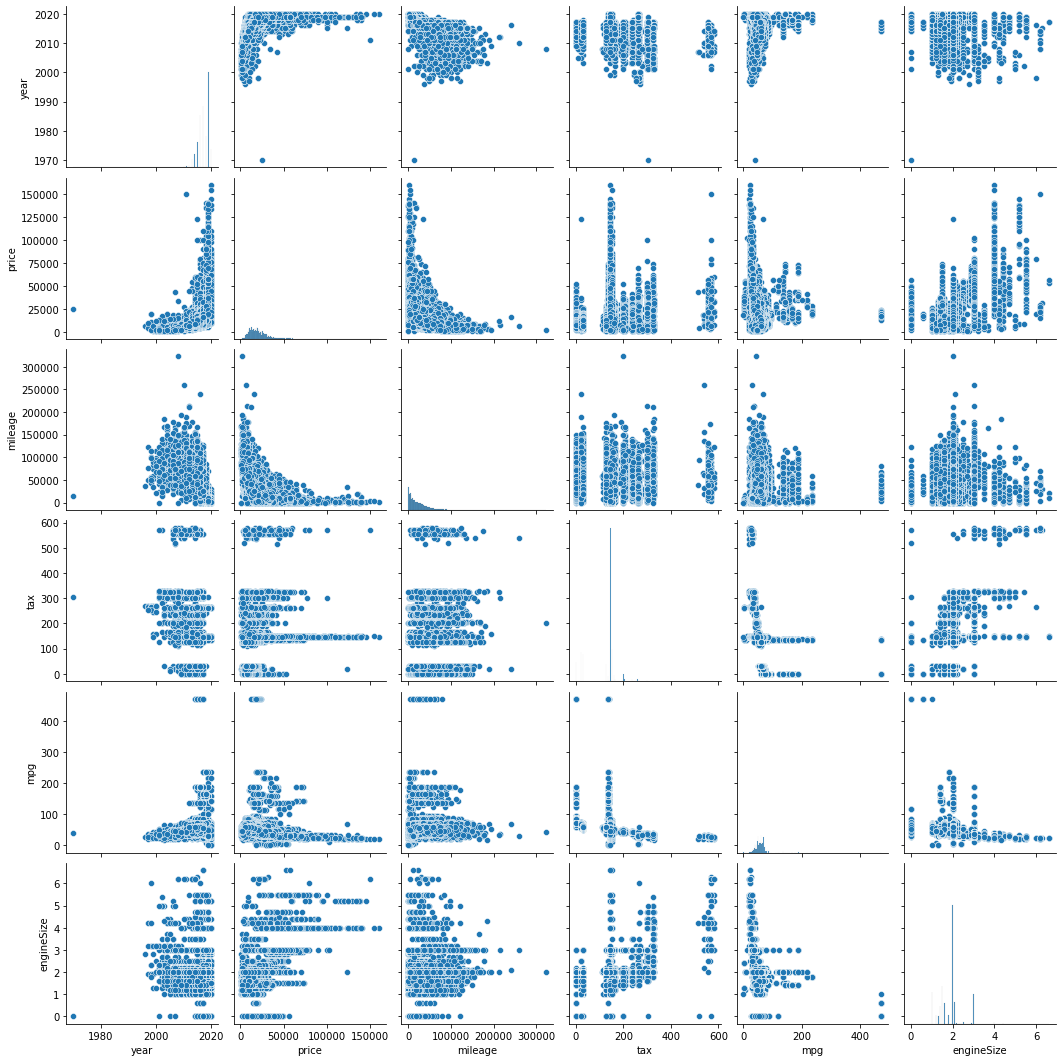

In [118]:
sns.pairplot(df)

C:\Users\kotam\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

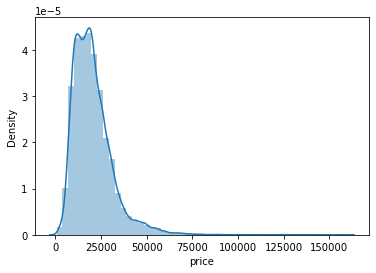

In [119]:
sns.distplot(df['price'])

In [128]:
X_data = df [['mileage']]
y_data = df[['price']]

In [129]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler().fit(X_data)
data_scaled = scaler.transform(X_data)
X_scaled = data_scaled

In [130]:
scaler = preprocessing.MinMaxScaler().fit(y_data)
data_scaled = scaler.transform(y_data)
y_scaled = data_scaled

In [131]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

kf = KFold(n_splits=10)
i = 1
scores = []
lm = LinearRegression()
for train, test in kf.split(X_scaled):
    print("Fold: {}".format(i))
    X_train, X_test, y_train, y_test = X_scaled[train], X_scaled[test], y_scaled[train], y_scaled[test]
    lm.fit(X_train,y_train)
    score = lm.score(X_test, y_test)
    scores.append(score)
    print(f"Accuracy for the fold no. {i} on the test set: {score}%")
    i += 1

Fold: 1
Accuracy for the fold no. 1 on the test set: 0.15548856956689994%
Fold: 2
Accuracy for the fold no. 2 on the test set: 0.3331813187903554%
Fold: 3
Accuracy for the fold no. 3 on the test set: 0.13090963123898258%
Fold: 4
Accuracy for the fold no. 4 on the test set: 0.28720173646248115%
Fold: 5
Accuracy for the fold no. 5 on the test set: -2.2546340601915307%
Fold: 6
Accuracy for the fold no. 6 on the test set: 0.09840833453773679%
Fold: 7
Accuracy for the fold no. 7 on the test set: 0.10700693880773193%
Fold: 8
Accuracy for the fold no. 8 on the test set: 0.19318263810176728%
Fold: 9
Accuracy for the fold no. 9 on the test set: -1.3964824897375094%
Fold: 10
Accuracy for the fold no. 10 on the test set: 0.17967274571814273%


In [132]:
from numpy import mean, std

print('Accuracy: {} ({})'.format(mean(scores), std(scores)))

Accuracy: -0.21660646367049421 (0.8300541943989699)


In [133]:
y_pred = lm.predict(X_test)

In [134]:
from sklearn.model_selection import cross_val_score

linreg = LinearRegression()
scores = cross_val_score(linreg, X_scaled, y_scaled, cv=10, scoring="neg_mean_squared_error")

print(scores)
print('Accuracy: {} ({})'.format(mean(scores), std(scores)))

[-0.0040596  -0.00328876 -0.00489981 -0.00325585 -0.00573361 -0.0042088
 -0.0057548  -0.00170947 -0.00292828 -0.00307659]
Accuracy: -0.003891558054309929 (0.0012300970480299707)


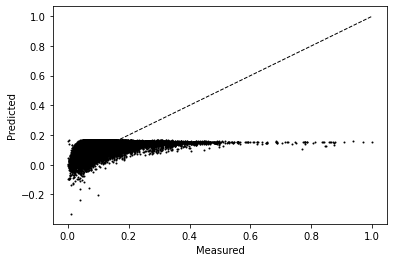

In [135]:
from sklearn.model_selection import cross_val_predict

lr = LinearRegression()
predicted = cross_val_predict(lr, X_scaled, y_scaled, cv=10)

fig, ax = plt.subplots()
ax.scatter(y_scaled, predicted, edgecolors=(0, 0, 0), s=1)
ax.plot([y_scaled.min(), y_scaled.max()], [y_scaled.min(), y_scaled.max()], 'k--', lw=1)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [136]:
df = pd.DataFrame({'Actual':[y_test], 'Predicted':[y_pred]})
df

,Actual,Predicted
0,"[[0.047317523172407734], [0.05196769355314435]...","[[0.1069743185108884], [0.1171909597049857], [..."


In [137]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_test,y_pred)
mae

0.04271605608814599

In [138]:
mse = metrics.mean_squared_error(y_test,y_pred)
mse

0.0030765888640909545

In [139]:
rmse = np.sqrt(metrics.mean_squared_error(y_test,y_pred))
rmse

0.05546700698695536

In [140]:
r2 = metrics.r2_score(y_test,y_pred)
r2

0.17967274571814273